# Spaceship Titanic

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

## Loading the data

In [106]:
train_data_csv = pd.read_csv("../data/train.csv")
test_data_csv = pd.read_csv("../data/test.csv")

## Looking at the data

In [107]:
train_data_csv.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [108]:
test_data_csv.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<Axes: xlabel='Transported'>

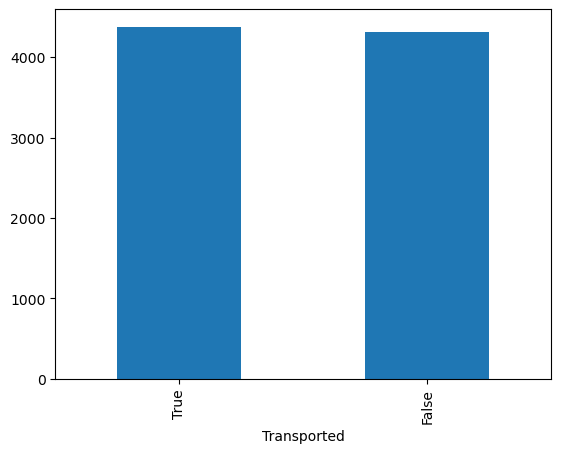

In [109]:
plot_df = train_data_csv.Transported.value_counts()
plot_df.plot(kind="bar")

In [110]:
"""
fig, ax = plt.subplots(5, 1, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed

# Looking at the numerical distribution
ax[0].hist(train_data_csv['Age'].dropna(), bins=50, color='b')
ax[0].set_title('Age Distribution')

ax[1].hist(train_data_csv['FoodCourt'].dropna(), bins=50, color='b')
ax[1].set_title('FoodCourt Distribution')

ax[2].hist(train_data_csv['ShoppingMall'].dropna(), bins=50, color='b')
ax[2].set_title('ShoppingMall Distribution')

ax[3].hist(train_data_csv['Spa'].dropna(), bins=50, color='b')
ax[3].set_title('Spa Distribution')

ax[4].hist(train_data_csv['VRDeck'].dropna(), bins=50, color='b')
ax[4].set_title('VRDeck Distribution')

plt.show()
"""

"\nfig, ax = plt.subplots(5, 1, figsize=(10, 10))\nplt.subplots_adjust(hspace=0.5)  # adjust vertical spacing as needed\n\n# Looking at the numerical distribution\nax[0].hist(train_data_csv['Age'].dropna(), bins=50, color='b')\nax[0].set_title('Age Distribution')\n\nax[1].hist(train_data_csv['FoodCourt'].dropna(), bins=50, color='b')\nax[1].set_title('FoodCourt Distribution')\n\nax[2].hist(train_data_csv['ShoppingMall'].dropna(), bins=50, color='b')\nax[2].set_title('ShoppingMall Distribution')\n\nax[3].hist(train_data_csv['Spa'].dropna(), bins=50, color='b')\nax[3].set_title('Spa Distribution')\n\nax[4].hist(train_data_csv['VRDeck'].dropna(), bins=50, color='b')\nax[4].set_title('VRDeck Distribution')\n\nplt.show()\n"

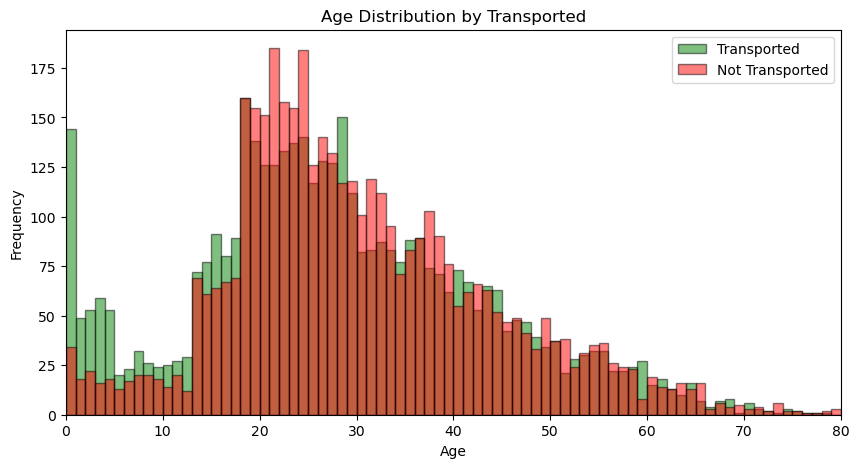

In [111]:
bins = np.arange(0, 82, 1)

transported = train_data_csv[train_data_csv['Transported'] == True]['Age'].dropna()
not_transported = train_data_csv[train_data_csv['Transported'] == False]['Age'].dropna()

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(transported, bins=bins, alpha=0.5, label='Transported', color='green', edgecolor='black', linewidth=1.0)
ax.hist(not_transported, bins=bins, alpha=0.5, label='Not Transported', color='red', edgecolor='black', linewidth=1.0)
ax.set_xlim(0, 80)
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Distribution by Transported')
ax.legend()

plt.show()

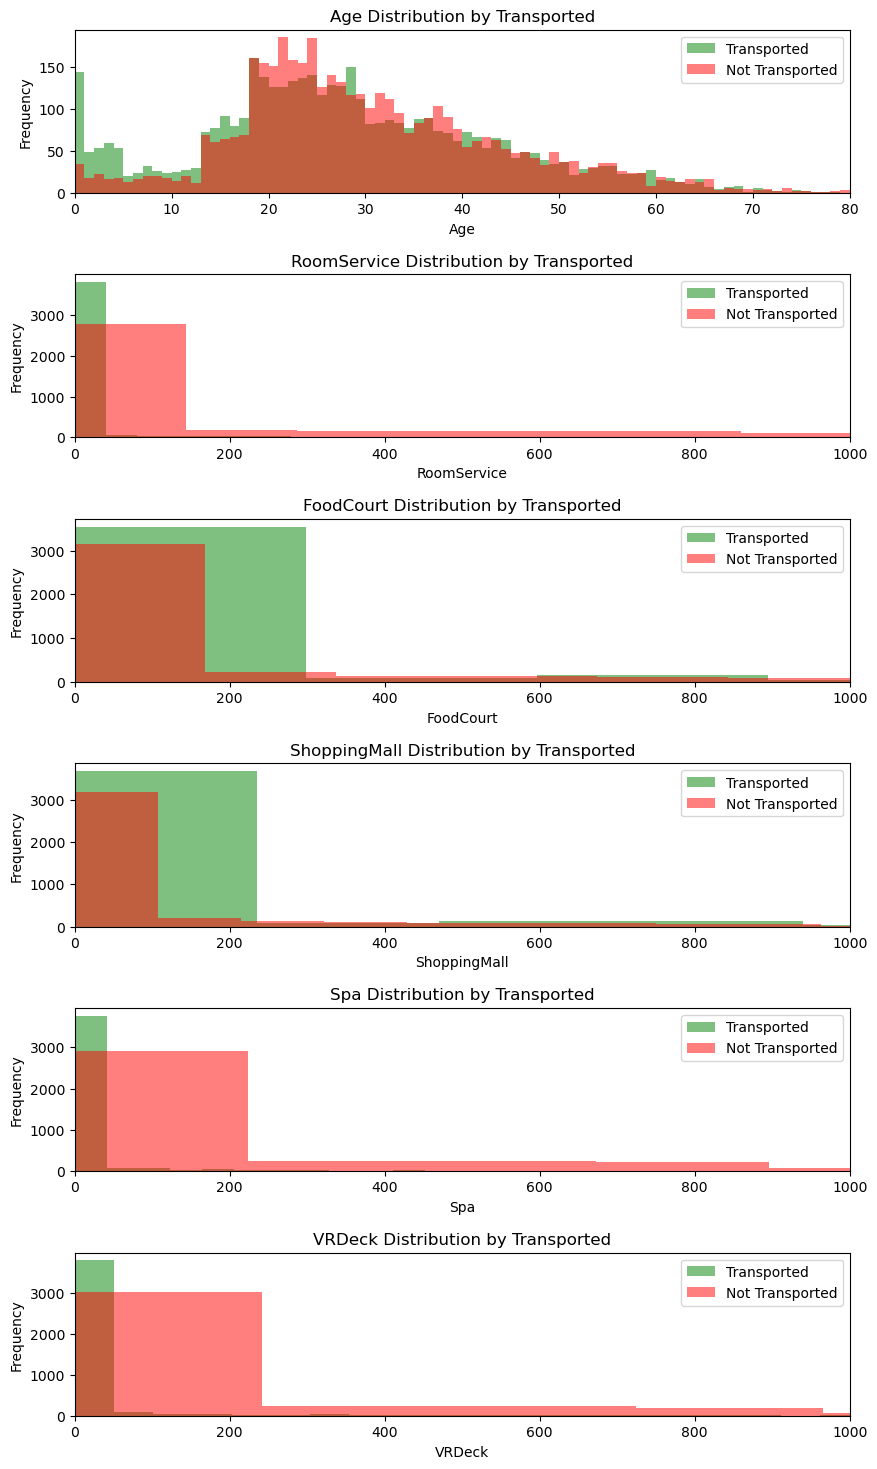

In [112]:
features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(len(features), 1, figsize=(10, len(features) * 3))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    transported = train_data_csv[train_data_csv['Transported'] == True][feature].dropna()
    not_transported = train_data_csv[train_data_csv['Transported'] == False][feature].dropna()

    if feature == 'Age':
        # Create bin edges so that each bin represents one year (0-1, 1-2, ..., 79-80)
        bins = np.arange(0, 82, 1)  # 0 to 81, ensuring bins for ages 0 to 80
        axes[i].set_xlim(0, 80)
    else:
        bins = 100
        axes[i].set_xlim(0, 1000)

    axes[i].hist(transported, bins=bins, alpha=0.5, label='Transported', color='green')
    axes[i].hist(not_transported, bins=bins, alpha=0.5, label='Not Transported', color='red')
    axes[i].set_title(f'{feature} Distribution by Transported')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.show()


Looking at the histograms directly we can se that there is an overrepresentation in transported/not transported for:
- Age: [0-18], we can split this as [0,5], [6,13], [14,18]
- RoomService: Transported: [0,40], not transported: (40, 143], not transported (143, -->]
- FoodCourt: Not Transported: [0,168.56], Transported (168.56, 298.125], [298.125, -->] Not transported
- ShoppingMall: Not transported: [0, 107], Transported (107, 235], not transported (235, -->]
- Spa: Transported [0, 41], not transported: (41, 225], Not transported (225, -->]
- VRDeck: Transported [0, 50], Not transported (0, 240], Not transported (240, -->]

Only need 2 intervals for each label

In [113]:
# First we need to fill missing values for Age, RoomService, FoodCourt, ShoppingMall, Spa and VRDeck:

missing_values = test_data_csv.isna().sum()
print(missing_values)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [114]:
# Fill them with median value

# Fill missing values in the training set using its own median
train_data_csv['Age'] = train_data_csv['Age'].fillna(train_data_csv['Age'].median())
train_data_csv['RoomService'] = train_data_csv['RoomService'].fillna(train_data_csv['RoomService'].median())
train_data_csv['FoodCourt'] = train_data_csv['FoodCourt'].fillna(train_data_csv['FoodCourt'].median())
train_data_csv['ShoppingMall'] = train_data_csv['ShoppingMall'].fillna(train_data_csv['ShoppingMall'].median())
train_data_csv['Spa'] = train_data_csv['Spa'].fillna(train_data_csv['Spa'].median())
train_data_csv['VRDeck'] = train_data_csv['VRDeck'].fillna(train_data_csv['VRDeck'].median())

# Fill missing values in the test set using the medians from the training set
test_data_csv['Age'] = test_data_csv['Age'].fillna(train_data_csv['Age'].median())
test_data_csv['RoomService'] = test_data_csv['RoomService'].fillna(train_data_csv['RoomService'].median())
test_data_csv['FoodCourt'] = test_data_csv['FoodCourt'].fillna(train_data_csv['FoodCourt'].median())
test_data_csv['ShoppingMall'] = test_data_csv['ShoppingMall'].fillna(train_data_csv['ShoppingMall'].median())
test_data_csv['Spa'] = test_data_csv['Spa'].fillna(train_data_csv['Spa'].median())
test_data_csv['VRDeck'] = test_data_csv['VRDeck'].fillna(train_data_csv['VRDeck'].median())

In [115]:
# Age
train_data_csv['Age_0_5']   = ((train_data_csv['Age'] >= 0)  & (train_data_csv['Age'] <= 5)).astype(int)
train_data_csv['Age_6_13']  = ((train_data_csv['Age'] >= 6)  & (train_data_csv['Age'] <= 13)).astype(int)
train_data_csv['Age_14_18'] = ((train_data_csv['Age'] >= 14) & (train_data_csv['Age'] <= 18)).astype(int) #Added
train_data_csv['Age_18_plus'] = ((train_data_csv['Age'] > 18)).astype(int)

"""
# RoomService
train_data_csv['RoomService_0_40']    = ((train_data_csv['RoomService'] >= 0)   & (train_data_csv['RoomService'] <= 40)).astype(int)
train_data_csv['RoomService_41_plus']  = ((train_data_csv['RoomService'] > 40)).astype(int)
#train_data_csv['RoomService_144_plus'] = (train_data_csv['RoomService'] > 143).astype(int)

# FoodCourt
train_data_csv['FoodCourt_0_168.56']         = ((train_data_csv['FoodCourt'] >= 0)         & (train_data_csv['FoodCourt'] <= 168.56)).astype(int)
train_data_csv['FoodCourt_168.56_298.125']     = ((train_data_csv['FoodCourt'] > 168.56)      & (train_data_csv['FoodCourt'] <= 298.125)).astype(int)
train_data_csv['FoodCourt_298.125_plus']       = (train_data_csv['FoodCourt'] > 298.125).astype(int)

# ShoppingMall
train_data_csv['ShoppingMall_0_107']    = ((train_data_csv['ShoppingMall'] >= 0)   & (train_data_csv['ShoppingMall'] <= 107)).astype(int)
train_data_csv['ShoppingMall_107_235']  = ((train_data_csv['ShoppingMall'] > 107)    & (train_data_csv['ShoppingMall'] <= 235)).astype(int)
train_data_csv['ShoppingMall_235_plus'] = (train_data_csv['ShoppingMall'] > 235).astype(int)

# Spa
train_data_csv['Spa_0_41']     = ((train_data_csv['Spa'] >= 0)   & (train_data_csv['Spa'] <= 41)).astype(int)
train_data_csv['Spa_41_plus']   = ((train_data_csv['Spa'] > 41)).astype(int)
#train_data_csv['Spa_225_plus'] = (train_data_csv['Spa'] > 225).astype(int)

# VRDeck
train_data_csv['VRDeck_0_50']    = ((train_data_csv['VRDeck'] >= 0)   & (train_data_csv['VRDeck'] <= 50)).astype(int)
train_data_csv['VRDeck_51_240']  = ((train_data_csv['VRDeck'] > 50)    & (train_data_csv['VRDeck'] <= 240)).astype(int)
train_data_csv['VRDeck_240_plus'] = (train_data_csv['VRDeck'] > 240).astype(int)
"""

##
## Doing the same for the test data
##

# Age
test_data_csv['Age_0_5']   = ((test_data_csv['Age'] >= 0)  & (test_data_csv['Age'] <= 5)).astype(int)
test_data_csv['Age_6_13']  = ((test_data_csv['Age'] >= 6)  & (test_data_csv['Age'] <= 13)).astype(int)
test_data_csv['Age_14_18'] = ((test_data_csv['Age'] >= 14) & (test_data_csv['Age'] <= 18)).astype(int)
test_data_csv['Age_18_plus'] = ((test_data_csv['Age'] > 18)).astype(int)

"""
# RoomService
test_data_csv['RoomService_0_40']    = ((test_data_csv['RoomService'] >= 0)   & (test_data_csv['RoomService'] <= 40)).astype(int)
test_data_csv['RoomService_41_plus']  = ((train_data_csv['RoomService'] > 40)).astype(int)
#test_data_csv['RoomService_144_plus'] = (test_data_csv['RoomService'] > 143).astype(int)

# FoodCourt
test_data_csv['FoodCourt_0_168.56']         = ((test_data_csv['FoodCourt'] >= 0)         & (test_data_csv['FoodCourt'] <= 168.56)).astype(int)
test_data_csv['FoodCourt_168.56_298.125']     = ((test_data_csv['FoodCourt'] > 168.56)      & (test_data_csv['FoodCourt'] <= 298.125)).astype(int)
test_data_csv['FoodCourt_298.125_plus']       = (test_data_csv['FoodCourt'] > 298.125).astype(int)

# ShoppingMall
test_data_csv['ShoppingMall_0_107']    = ((test_data_csv['ShoppingMall'] >= 0)   & (test_data_csv['ShoppingMall'] <= 107)).astype(int)
test_data_csv['ShoppingMall_107_235']  = ((test_data_csv['ShoppingMall'] > 107)    & (test_data_csv['ShoppingMall'] <= 235)).astype(int)
test_data_csv['ShoppingMall_235_plus'] = (test_data_csv['ShoppingMall'] > 235).astype(int)

# Spa
test_data_csv['Spa_0_41']     = ((test_data_csv['Spa'] >= 0)   & (test_data_csv['Spa'] <= 41)).astype(int)
test_data_csv['Spa_41_plus']   = ((test_data_csv['Spa'] > 41)).astype(int)
#test_data_csv['Spa_225_plus'] = (test_data_csv['Spa'] > 225).astype(int)

# VRDeck
test_data_csv['VRDeck_0_50']    = ((test_data_csv['VRDeck'] >= 0)   & (test_data_csv['VRDeck'] <= 50)).astype(int)
test_data_csv['VRDeck_51_240']  = ((test_data_csv['VRDeck'] > 50)    & (test_data_csv['VRDeck'] <= 240)).astype(int)
test_data_csv['VRDeck_240_plus'] = (test_data_csv['VRDeck'] > 240).astype(int)

# Shopping mall
test_data_csv['ShoppingMall_0_107']    = ((test_data_csv['ShoppingMall'] >= 0)   & (test_data_csv['ShoppingMall'] <= 107)).astype(int)
test_data_csv['ShoppingMall_107_235']  = ((test_data_csv['ShoppingMall'] > 107)    & (test_data_csv['ShoppingMall'] <= 235)).astype(int)
test_data_csv['ShoppingMall_235_plus'] = (test_data_csv['ShoppingMall'] > 235).astype(int)

# Spa
test_data_csv['Spa_0_41']     = ((test_data_csv['Spa'] >= 0)   & (test_data_csv['Spa'] <= 41)).astype(int)
test_data_csv['Spa_41_225']   = ((test_data_csv['Spa'] > 41)   & (test_data_csv['Spa'] <= 225)).astype(int)
test_data_csv['Spa_225_plus'] = (test_data_csv['Spa'] > 225).astype(int)

# VRDeck
test_data_csv['VRDeck_0_50']    = ((test_data_csv['VRDeck'] >= 0)   & (test_data_csv['VRDeck'] <= 50)).astype(int)
test_data_csv['VRDeck_51_240']  = ((test_data_csv['VRDeck'] > 50)    & (test_data_csv['VRDeck'] <= 240)).astype(int)
test_data_csv['VRDeck_240_plus'] = (test_data_csv['VRDeck'] > 240).astype(int)
"""


#print(train_data_csv.columns)
missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Age_0_5           0
Age_6_13          0
Age_14_18         0
Age_18_plus       0
dtype: int64


Dropping some of the original columns

In [116]:
# 1. Drop the original columns that have been replaced by dummy variables and useless columns
# Ranges:
cols_to_drop = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'HomePlanet']
# Only ages:
#cols_to_drop = ['Age', 'HomePlanet', 'Name', 'Spa']
train_data_csv = train_data_csv.drop(columns=cols_to_drop)
test_data_csv = test_data_csv.drop(columns=cols_to_drop)

train_data_csv[['Deck', 'Num', 'Side']] = train_data_csv['Cabin'].str.split('/', expand=True)
train_data_csv.drop(columns=['Cabin'], inplace=True)

test_data_csv[['Deck', 'Num', 'Side']] = test_data_csv['Cabin'].str.split('/', expand=True)
test_data_csv.drop(columns=['Cabin'], inplace=True)

#print(train_data_csv.columns)
#print(test_data_csv.columns)

missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId      0
CryoSleep      217
Destination    182
VIP            203
Transported      0
Age_0_5          0
Age_6_13         0
Age_14_18        0
Age_18_plus      0
Deck           199
Num            199
Side           199
dtype: int64


In [117]:
train_data_csv.head()

,PassengerId,CryoSleep,Destination,VIP,Transported,Age_0_5,Age_6_13,Age_14_18,Age_18_plus,Deck,Num,Side
0,0001_01,False,TRAPPIST-1e,False,False,0,0,0,1,B,0,P
1,0002_01,False,TRAPPIST-1e,False,True,0,0,0,1,F,0,S
2,0003_01,False,TRAPPIST-1e,True,False,0,0,0,1,A,0,S
3,0003_02,False,TRAPPIST-1e,False,False,0,0,0,1,A,0,S
4,0004_01,False,TRAPPIST-1e,False,True,0,0,1,0,F,1,S


Changing boolean values to binary 0 and 1

In [118]:
# Convert boolean columns to integers
encode_columns = ['Destination', 'Deck', 'Side']

bool_columns = ['CryoSleep', 'VIP', 'Transported']
train_data_csv[bool_columns] = train_data_csv[bool_columns].fillna(False) # Prøv å endre (var False)
train_data_csv[bool_columns] = train_data_csv[bool_columns].astype(int)
train_data_csv = pd.get_dummies(train_data_csv, columns=encode_columns, dtype=int)

#Do the same for test data
bool_columns_test = ['CryoSleep', 'VIP']
test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].fillna(False)
test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].astype(int)
test_data_csv = pd.get_dummies(test_data_csv, columns=encode_columns, dtype=int)

train_data_csv.head()
print(train_data_csv.columns)
train_data_csv.head()

Index(['PassengerId', 'CryoSleep', 'VIP', 'Transported', 'Age_0_5', 'Age_6_13',
       'Age_14_18', 'Age_18_plus', 'Num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T',
       'Side_P', 'Side_S'],
      dtype='object')


C:\Users\elias\AppData\Local\Temp\ipykernel_11248\3610701700.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_csv[bool_columns] = train_data_csv[bool_columns].fillna(False) # Prøv å endre (var False)
C:\Users\elias\AppData\Local\Temp\ipykernel_11248\3610701700.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_csv[bool_columns_test] = test_data_csv[bool_columns_test].fillna(False)


,PassengerId,CryoSleep,VIP,Transported,Age_0_5,Age_6_13,Age_14_18,Age_18_plus,Num,Destination_55 Cancri e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [119]:
missing_values = train_data_csv.isna().sum()
print(missing_values)
#train_data_csv.head()

PassengerId                    0
CryoSleep                      0
VIP                            0
Transported                    0
Age_0_5                        0
Age_6_13                       0
Age_14_18                      0
Age_18_plus                    0
Num                          199
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
Side_P                         0
Side_S                         0
dtype: int64


In [120]:
train_data_csv['Num'] = train_data_csv['Num'].fillna(0) ## Why do i do this?
test_data_csv['Num'] = test_data_csv['Num'].fillna(0) ## Why do i do this?

# Num is the room number, does not make sense to impute --> Delete the rows

# Drop rows with missing values in the 'Num' column for the training data
#train_data_csv = train_data_csv.dropna(subset=['Num'])

# Similarly, drop rows with missing values in the 'Num' column for the test data
#test_data_csv = test_data_csv.dropna(subset=['Num'])

In [121]:
print(train_data_csv.dtypes)

PassengerId                  object
CryoSleep                     int32
VIP                           int32
Transported                   int32
Age_0_5                       int32
Age_6_13                      int32
Age_14_18                     int32
Age_18_plus                   int32
Num                          object
Destination_55 Cancri e       int32
Destination_PSO J318.5-22     int32
Destination_TRAPPIST-1e       int32
Deck_A                        int32
Deck_B                        int32
Deck_C                        int32
Deck_D                        int32
Deck_E                        int32
Deck_F                        int32
Deck_G                        int32
Deck_T                        int32
Side_P                        int32
Side_S                        int32
dtype: object


In [122]:
convert_dict = {'Num':int} #'PassengerId':int,'RoomService':int, 'FoodCourt':int, 'Spa':int, 'VRDeck':int, 
train_data_csv = train_data_csv.astype(dtype=convert_dict)
test_data_csv = test_data_csv.astype(dtype=convert_dict)
print(train_data_csv.dtypes)

PassengerId                  object
CryoSleep                     int32
VIP                           int32
Transported                   int32
Age_0_5                       int32
Age_6_13                      int32
Age_14_18                     int32
Age_18_plus                   int32
Num                           int32
Destination_55 Cancri e       int32
Destination_PSO J318.5-22     int32
Destination_TRAPPIST-1e       int32
Deck_A                        int32
Deck_B                        int32
Deck_C                        int32
Deck_D                        int32
Deck_E                        int32
Deck_F                        int32
Deck_G                        int32
Deck_T                        int32
Side_P                        int32
Side_S                        int32
dtype: object


We should split "Cabin" into 3 variables: deck num side.

We can see that the median value is 0 for all numeric values when Cryosleep is True. We can conclude that we can fill all missing values with 0.

In [123]:
missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId                  0
CryoSleep                    0
VIP                          0
Transported                  0
Age_0_5                      0
Age_6_13                     0
Age_14_18                    0
Age_18_plus                  0
Num                          0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64


In [124]:
missing_values = train_data_csv.isna().sum()
print(missing_values)

PassengerId                  0
CryoSleep                    0
VIP                          0
Transported                  0
Age_0_5                      0
Age_6_13                     0
Age_14_18                    0
Age_18_plus                  0
Num                          0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_P                       0
Side_S                       0
dtype: int64


Temporary delete all missing values --> change this later

In [125]:
#train_data_csv.dropna(inplace=True)
print(len(train_data_csv.index))

8693


Splitting the PassengerId

In [126]:
train_data_csv[['PassengerNumber', 'PassengerSubID']] = train_data_csv['PassengerId'].str.split('_', expand=True)
#train_data_csv.drop(columns=['PassengerId'], inplace=True)

test_data_csv[['PassengerNumber', 'PassengerSubID']] = test_data_csv['PassengerId'].str.split('_', expand=True)
#test_data_csv.drop(columns=['PassengerId'], inplace=True)

In [127]:
train_data_csv.head()

,PassengerId,CryoSleep,VIP,Transported,Age_0_5,Age_6_13,Age_14_18,Age_18_plus,Num,Destination_55 Cancri e,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,PassengerNumber,PassengerSubID
0,0001_01,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0001,01
1,0002_01,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0002,01
2,0003_01,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0003,01
3,0003_02,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0003,02
4,0004_01,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0004,01


In [128]:
print(len(test_data_csv.index))

4277


In [129]:
SEED = 50

In [130]:
# Random forrest classifier

X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

rf_model = RandomForestClassifier(n_estimators=1000, random_state=SEED)
rf_model.fit(X_train, y_train)

val_accuracy = rf_model.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.3f}")

rf_model.fit(X, y)

# Kaggle predictions
preds_test = rf_model.predict(test_data_csv)

# File to submit
submission = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'], # This col needs to exist in test data!
    'Transported': preds_test.astype(bool)
})

submission.to_csv("submissions/rfc_submission.csv", index=False)
print("Submission file saved as submission.csv")

importances = rf_model.feature_importances_
feature_names = X.columns

# Pair them up and sort
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for name, score in feat_imp:
    print(f"{name}: {score:.4f}")

Validation Accuracy: 0.689


OSError: Cannot save file into a non-existent directory: 'submissions'

In [ ]:
# Decision tree classifier

X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

dt_model = DecisionTreeClassifier(random_state=SEED)
dt_model.fit(X_train, y_train)

val_accuracy = dt_model.score(X_val, y_val)
print(f"[DecisionTree] Validation Accuracy: {val_accuracy:.3f}")

dt_model.fit(X, y)

preds_test_dt = dt_model.predict(test_data_csv)

submission_dt = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'],
    'Transported': preds_test_dt.astype(bool)
})
submission_dt.to_csv("submissions/dt_submission.csv", index=False)
print("Submission file saved as dt_submission.csv")


In [ ]:
# Logistic Regression Classifier

X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

lr_model = LogisticRegression(max_iter=1000, random_state=SEED)
lr_model.fit(X_train, y_train)

val_accuracy = lr_model.score(X_val, y_val)
print(f"[LogisticRegression] Validation Accuracy: {val_accuracy:.3f}")

lr_model.fit(X, y)

preds_test_lr = lr_model.predict(test_data_csv)

submission_lr = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'],
    'Transported': preds_test_lr.astype(bool)
})
submission_lr.to_csv("submissions/lr_submission.csv", index=False)

print("Submission file saved as lr_submission.csv")


In [ ]:
# Gradient Boost

# Prepare the data
X = train_data_csv.drop('Transported', axis=1)
y = train_data_csv['Transported']

# Split the data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=SEED, learning_rate=0.05, n_estimators=500, subsample=1, max_depth=5)
gb_model.fit(X_train, y_train)

# Evaluate on the validation set
val_accuracy = gb_model.score(X_val, y_val)
print(f"[GradientBoostingClassifier] Validation Accuracy: {val_accuracy:.3f}")

# Retrain on the full dataset
gb_model.fit(X, y)

# Generate predictions for the test dataset
preds_test_gb = gb_model.predict(test_data_csv)

# Create a submission DataFrame
submission_gb = pd.DataFrame({
    'PassengerId': test_data_csv['PassengerId'],
    'Transported': preds_test_gb.astype(bool)
})

# Save the submission file
submission_gb.to_csv("submissions/gb_submission.csv", index=False)
print("Submission file saved as gb_submission.csv")